In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.dtypes

,0
age,float64
blood_pressure,float64
specific_gravity,float64
albumin,float64
sugar,float64
red_blood_cells,object
pus_cell,object
pus_cell_clumps,object
bacteria,object
blood_glucose_random,float64


In [ ]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
#due to some strings values in the column its an object column but say still you
#want to convert to numeric value, use pd.to_numeric, suppress the error and convert to nan

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors = 'coerce') #coerce meaning suppress or ignore

In [ ]:
df['packed_cell_volume'].dtype

dtype('float64')

In [ ]:
df['packed_cell_volume'].unique()
#all string character is converted to nan

array([44., 38., 31., 32., 35., 39., 36., 33., 29., 28., nan, 16., 24.,
       37., 30., 34., 40., 45., 27., 48., 52., 14., 22., 18., 42., 17.,
       46., 23., 19., 25., 41., 26., 15., 21., 43., 20., 47.,  9., 49.,
       50., 53., 51., 54.])

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors = 'coerce')

In [ ]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors = 'coerce')

In [ ]:
df.dtypes

,0
age,float64
blood_pressure,float64
specific_gravity,float64
albumin,float64
sugar,float64
red_blood_cells,object
pus_cell,object
pus_cell_clumps,object
bacteria,object
blood_glucose_random,float64


In [ ]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
num_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
df['diabetes_mellitus'].replace(to_replace= {' yes': 'yes', '\tyes':'yes', '\tno':'no'}, inplace = True)

In [ ]:
df['diabetes_mellitus'].unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')

In [ ]:
df['coronary_artery_disease'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
df['class'] = df['class'].map({'ckd': 1, 'notckd':0, 'ckd\t': 1})
#you could have also first replaced and then map with 1 and 0

In [ ]:
df['class'].unique()

array([1, 0])

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has [1 0] values



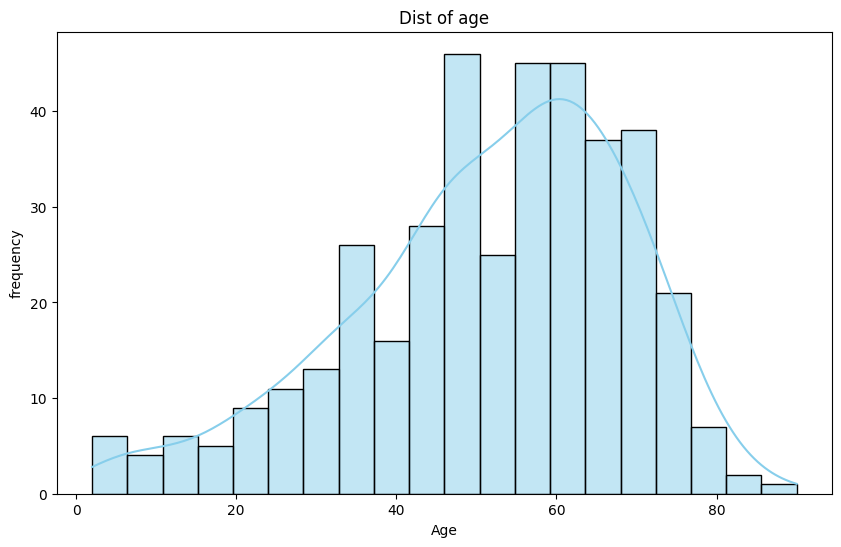

In [ ]:
#Univariate analysis

plt.figure(figsize = (10, 6))
sns.histplot(df['age'].dropna(), kde = True, bins = 20, color = 'skyblue')
plt.title('Dist of age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

In [ ]:
#insights >> Age is left skewe data

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='hypertension', ylabel='count'>

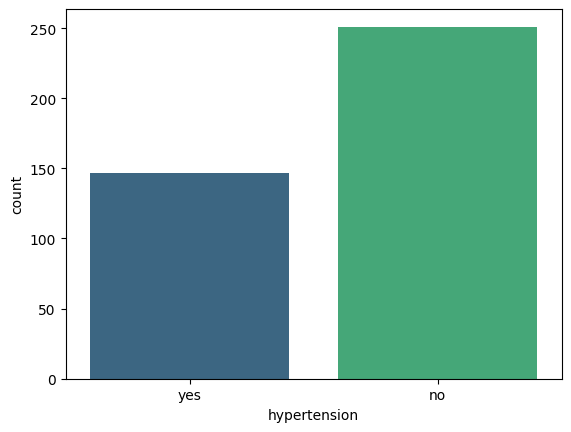

In [ ]:
sns.countplot(x = 'hypertension', data=df, palette = 'viridis')

In [ ]:
#150 of them has hypetension

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='class', ylabel='blood_urea'>

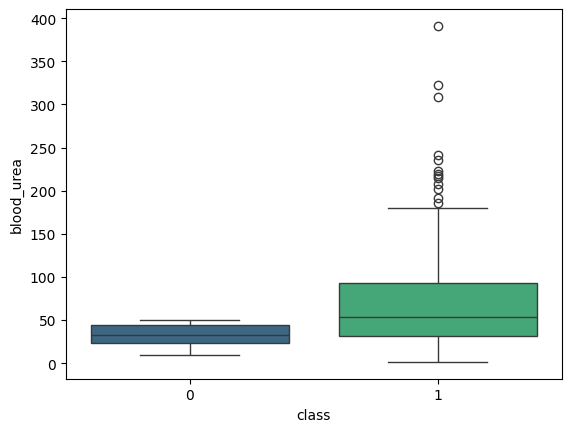

In [ ]:
sns.boxplot(x = 'class', y = 'blood_urea', data=df, palette = 'viridis')

In [ ]:
#insights>> people with kidney disease has higher blood_urea with outliers, median value is also higher

<Axes: xlabel='class', ylabel='serum_creatinine'>

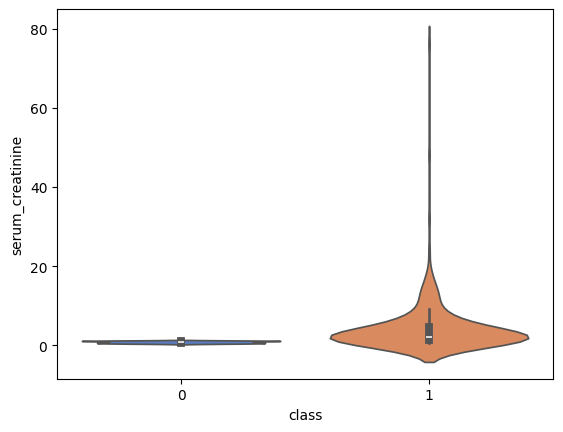

In [ ]:
sns.violinplot(x = 'class', y = 'serum_creatinine', data=df, palette = 'muted')

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='aanemia', ylabel='count'>

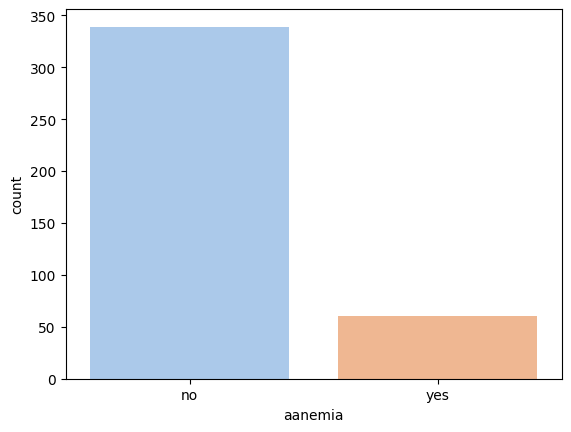

In [ ]:
sns.countplot(x = "aanemia", data=df, palette = 'pastel')

In [ ]:
#majority of people not suffering from anaemia

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: ylabel='count'>

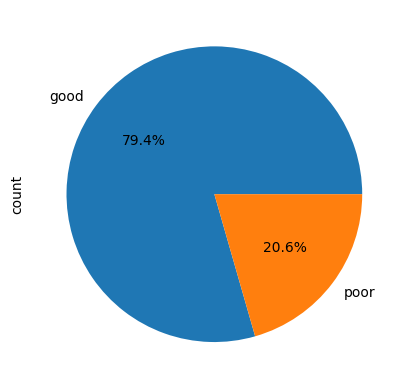

In [ ]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%')
#lets make pie chart more beautiful

<Axes: ylabel='count'>

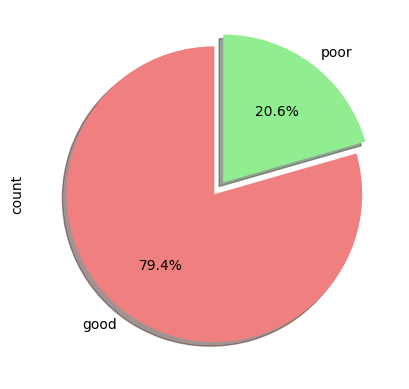

In [ ]:
df.appetite.value_counts().plot.pie(autopct = '%1.1f%%', colors=["lightcoral", "lightgreen"], explode = (0, 0.1), startangle=90, shadow = True)

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [ ]:
df.pus_cell_clumps

,pus_cell_clumps
0,notpresent
1,notpresent
2,notpresent
3,present
4,notpresent
...,...
395,notpresent
396,notpresent
397,notpresent
398,notpresent


<Axes: xlabel='pus_cell_clumps', ylabel='count'>

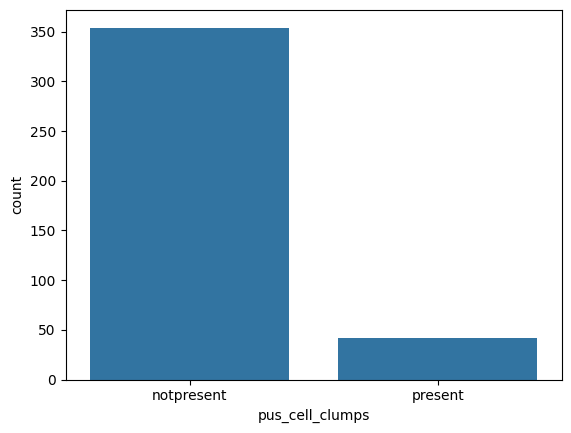

In [ ]:
sns.countplot(x = 'pus_cell_clumps', data=df)

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='white_blood_cell_count', ylabel='Count'>

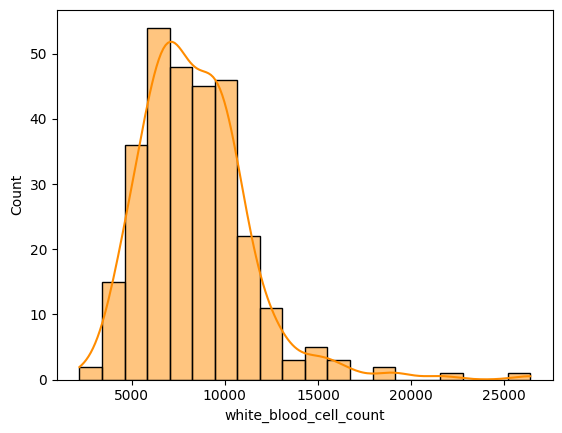

In [ ]:
sns.histplot(df['white_blood_cell_count'].dropna(), bins = 20, kde = True, color='darkorange')

In [ ]:
#donut plot >> donut chart or ring chart. It is essentially a pie chart with a hole in the center
#by specifying wedgeprops value
#used to display proportions

<Axes: ylabel='count'>

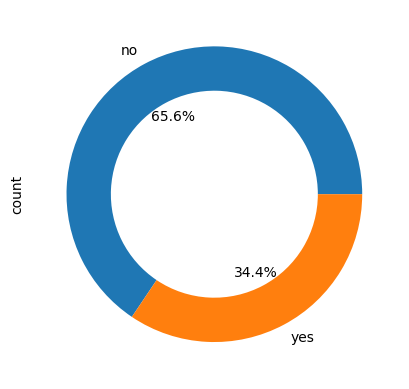

In [ ]:
df['diabetes_mellitus'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops = dict(width = 0.3))

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='coronary_artery_disease', ylabel='count'>

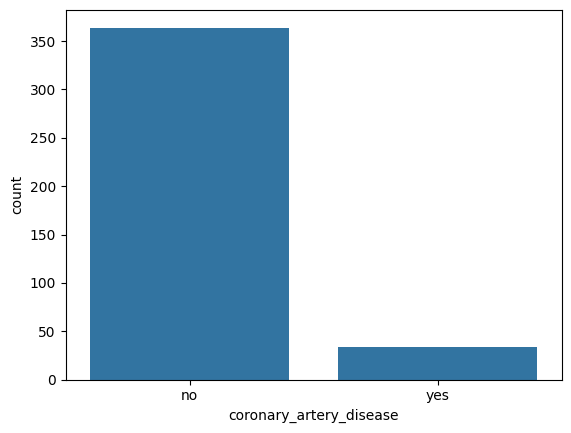

In [ ]:
sns.countplot(x = 'coronary_artery_disease', data=df)

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<Axes: xlabel='peda_edema', ylabel='count'>

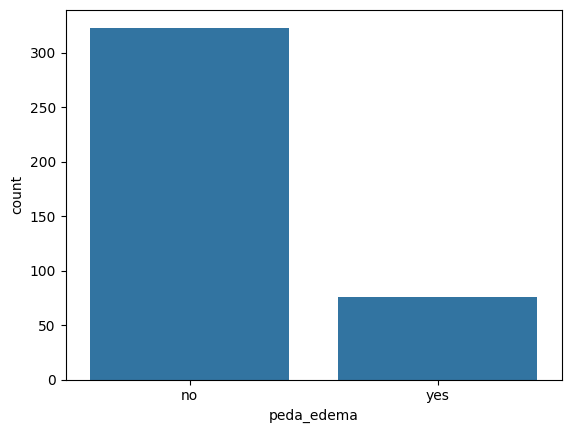

In [ ]:
sns.countplot(x = 'peda_edema', data=df)

<Axes: xlabel='bacteria', ylabel='count'>

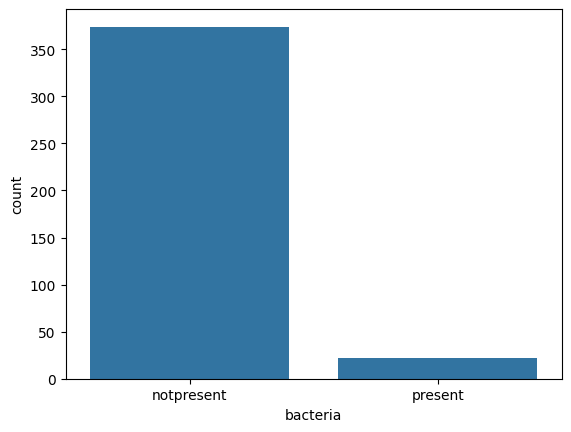

In [ ]:
sns.countplot(x = 'bacteria', data=df)

<Axes: xlabel='age', ylabel='blood_pressure'>

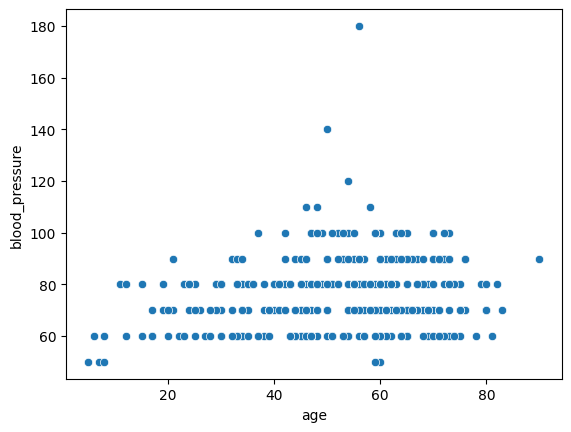

In [ ]:
#bivariate analysis
sns.scatterplot(x = 'age', y = 'blood_pressure', data=df)

In [ ]:
#insights>> age is incresing, bp is also increasing

<Axes: xlabel='age', ylabel='blood_pressure'>

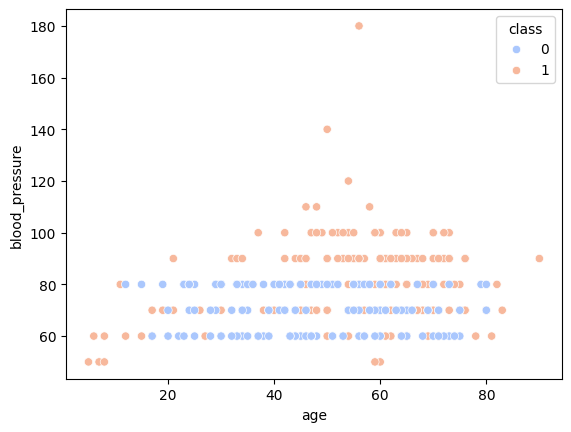

In [ ]:
sns.scatterplot(x = 'age', y = 'blood_pressure', data=df, hue = 'class', palette = 'coolwarm')

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

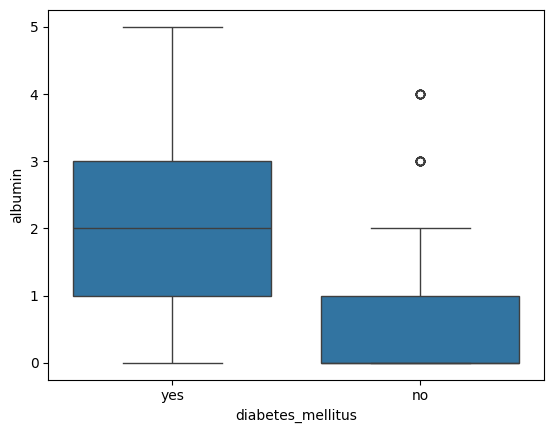

In [ ]:
sns.boxplot(x = 'diabetes_mellitus', y = 'albumin', data=df)

<Axes: xlabel='diabetes_mellitus', ylabel='albumin'>

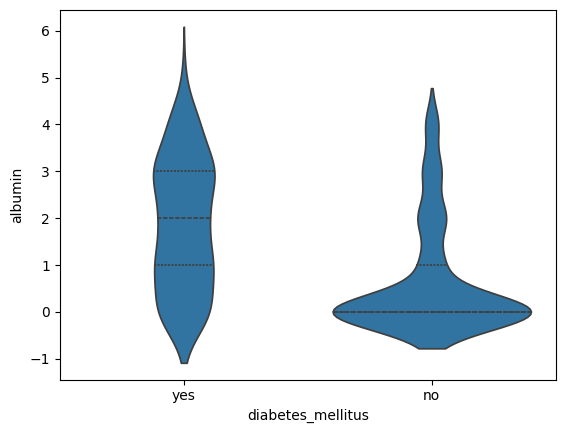

In [ ]:
sns.violinplot(x = 'diabetes_mellitus', y = 'albumin', data=df, inner = 'quartile')

In [ ]:
#stacked bar chart>> diabetes_mellitus and hypertension
pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
#crosstab summarises the data


hypertension,no,yes
diabetes_mellitus,,
no,220,41
yes,31,106


<Axes: xlabel='diabetes_mellitus'>

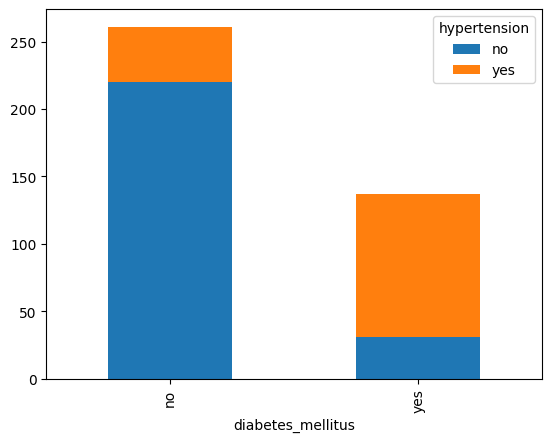

In [ ]:
diabetes_hypertension = pd.crosstab(df['diabetes_mellitus'], df['hypertension'])
diabetes_hypertension.plot(kind = 'bar', stacked = True)

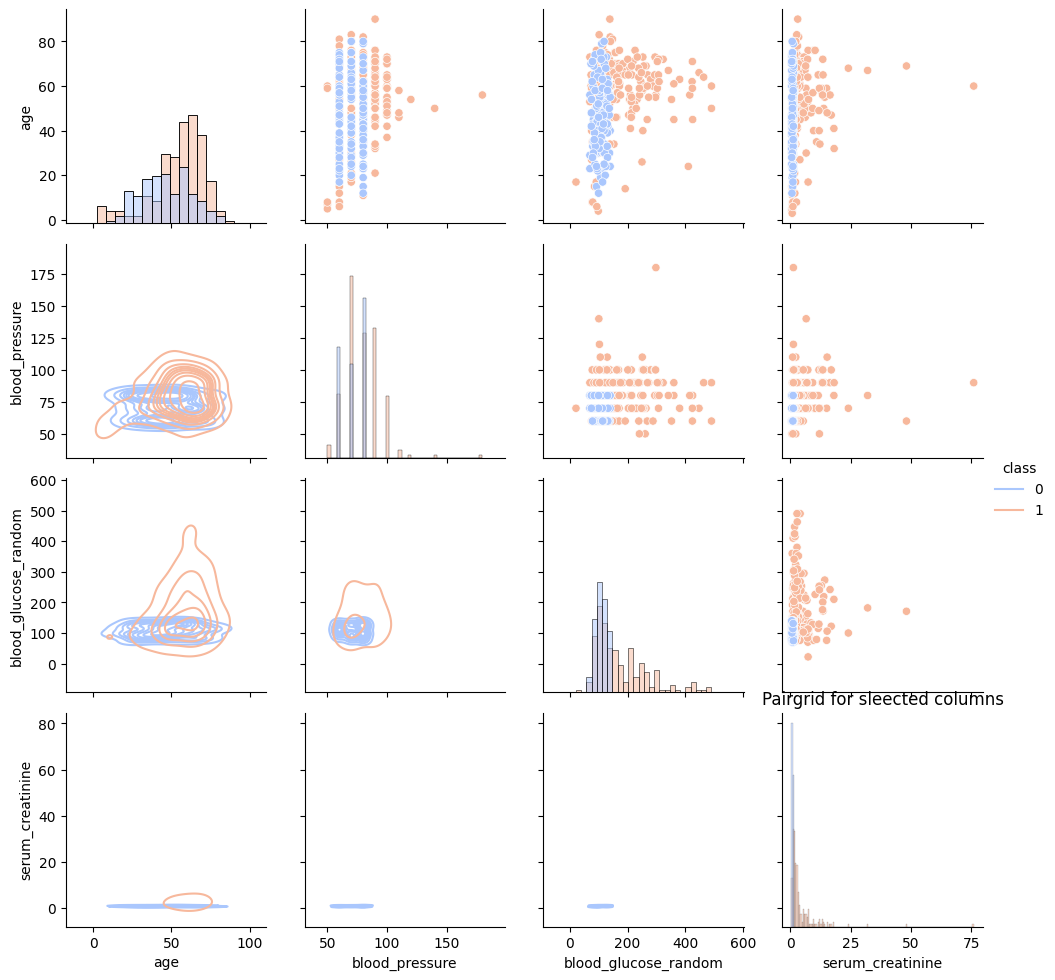

In [ ]:
#multivariate analysis
#customised pariplot
cols = ['age', 'blood_pressure', 'blood_glucose_random', 'serum_creatinine', 'class']
g = sns.PairGrid(df[cols], hue = 'class', palette = 'coolwarm')
g.map_upper(sns.scatterplot) #upper corner plot
g.map_lower(sns.kdeplot, cmap = 'Blues_d') #diagonal plot
g.map_diag(sns.histplot) #lower corner plot
g.add_legend()
plt.title("Pairgrid for sleected columns")
plt.show()

In [ ]:
sns.pairplot(df[cols], hue = 'class', palette = 'husl')

In [ ]:
df.corr(numeric_only = True)

In [ ]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot=True, cmap = "coolwarm", linewidth = 0.5)

In [ ]:
sns.swarmplot(x = 'diabetes_mellitus', y = 'age', hue = 'hypertension', data=df, palette='pastel', size = 8)

In [ ]:
#swarm plot allows to see all the overlapping data as well

In [ ]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class')
fig.show()

In [ ]:
fig = px.scatter(df, x = 'age', y = 'blood_pressure', color = 'class', hover_data=['serum_creatinine', 'haemoglobin'], title = "interactive scatterplot")
fig.show()

In [ ]:
df.columns

In [ ]:
fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure', z = 'serum_creatinine', color = 'class', title ="3d scatterplot")
fig.show()


In [ ]:
import plotly.graph_objects as go

data_corr = df.corr(numeric_only = True)
fig = go.Figure(data = go.Heatmap(z = data_corr.values, x = data_corr.columns, y = data_corr.index))
fig.show()

In [ ]:
fig = px.scatter_3d(df, x = 'age', y = 'blood_pressure', z = 'serum_creatinine', color = 'haemoglobin', title ="3d scatterplot")
fig.show()


In [ ]:
df.isnull().sum()

In [ ]:
cat_cols

In [ ]:
num_cols

In [ ]:
#replace with median, mean>> for numerical cols
median_values = df[num_cols].median()


In [ ]:
median_values

In [ ]:
df[num_cols] = df[num_cols].fillna(median_values)

In [ ]:
df[num_cols].isna().sum()

In [ ]:
mode_values = df.mode().iloc[0]

In [ ]:
df[cat_cols] = df[cat_cols].fillna(mode_values)

In [ ]:
df[cat_cols].isna().sum()

In [ ]:
df.dtypes

In [ ]:
#few columns are object columns>> convert object to numerical

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
X = df.drop('class', axis = 1)
y = df['class']

In [ ]:
#train test split and build model